In [1]:
import pandas as pd
import numpy as np

#import datetime
from datetime import datetime, date, timedelta
import time

from yahooquery import Ticker

import requests
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
ape_url = 'https://apewisdom.io/api/v1.0/filter/wallstreetbets'

ape_stonks = pd.DataFrame([])

new_results = True
#df =[]
df1 = []

page = 1

while new_results:

    res = requests.get(ape_url + f"/page/{page}").json()

    new_results = res.get("results", [])
    df = pd.DataFrame.from_dict(new_results)
    #df1 = pd.DataFrame.from_records(df.results)

    ape_stonks = ape_stonks.append(df)
    page += 1

In [3]:
ape_stonks['mentions_change'] = (ape_stonks.mentions.astype(float)/ape_stonks.mentions_24h_ago.astype(float) -1)

In [4]:
# conditions in case want to filter list of tickers
cond1 = ape_stonks.mentions_change >= .8
cond2= ape_stonks.mentions_change <= -.70


In [5]:
ape_stonks

,rank,ticker,name,mentions,upvotes,rank_24h_ago,mentions_24h_ago,mentions_change
0,1,SPY,SPDR S&amp;P 500 ETF Trust,504,2349,2,118,3.271186
1,2,TSLA,Tesla,200,879,4,45,3.444444
2,3,AMC,AMC Entertainment,141,536,5,37,2.810811
3,4,GME,GameStop,139,3483,1,114,0.219298
4,5,NVDA,NVIDIA,86,456,10,23,2.739130
...,...,...,...,...,...,...,...,...
64,765,BAM,Brookfield Asset Management,1,3,476,None,NaN
65,766,LE,Lands' End,1,-4,730,1,0.000000
66,767,MDT,Medtronic,1,0,145,None,NaN
67,768,MINI,Mobile Mini,1,18,324,None,NaN


In [6]:
# list of n number of tickers
ape_list = ape_stonks.ticker.to_list()[:20]

In [7]:
ape_list

['SPY',
 'TSLA',
 'AMC',
 'GME',
 'NVDA',
 'AAPL',
 'QQQ',
 'BABA',
 'PLTR',
 'BB',
 'MRNA',
 'ZM',
 'CCL',
 'UVXY',
 'MSFT',
 'NIO',
 'WISH',
 'IWM',
 'PFE',
 'IS']

In [8]:
stocks=ape_list
stocks2 = Ticker(stocks, asynchronous=True)

In [9]:
# 90 days worth of data
d = datetime.today() - timedelta(days=90)
yq_data = stocks2.history(start=d, interval='1d')

In [10]:
yq_data.reset_index(inplace=True)
yq_data

,symbol,date,open,high,close,low,volume,adjclose,dividends
0,SPY,2021-09-21,436.529999,437.910004,433.630005,433.070007,92526100,432.109131,0.0
1,SPY,2021-09-22,436.049988,440.029999,437.859985,433.750000,102350100,436.324280,0.0
2,SPY,2021-09-23,439.850006,444.890015,443.179993,439.600006,76396000,441.625610,0.0
3,SPY,2021-09-24,441.440002,444.670013,443.910004,441.209991,62094800,442.353058,0.0
4,SPY,2021-09-27,442.809998,444.049988,442.640015,441.899994,61371100,441.087524,0.0
...,...,...,...,...,...,...,...,...,...
1275,IS,2021-12-14,7.620000,7.970000,7.580000,7.370000,2178400,7.580000,0.0
1276,IS,2021-12-15,7.600000,7.920000,7.900000,7.450000,1823200,7.900000,0.0
1277,IS,2021-12-16,8.000000,8.240000,7.980000,7.790000,2458300,7.980000,0.0
1278,IS,2021-12-17,7.830000,8.170000,8.010000,7.660000,1802500,8.010000,0.0


In [11]:
#get latest volume
today_volume = yq_data.groupby('symbol')['volume'].last().to_dict()

In [12]:
# drop columns that are not used
yq_data = yq_data.drop(columns = ['open', 'low', 'close', 'high'])# 'dividends'])

In [13]:
# calculate log return using daily historical price data
yq_data = yq_data.assign(logret=np.log(yq_data.adjclose).groupby(yq_data.symbol).diff()) 

In [14]:
yq_data2 = yq_data[["date", "symbol","logret"]]

In [15]:
yq_data2.set_index('date')

,symbol,logret
date,,
2021-09-21,SPY,NaN
2021-09-22,SPY,0.009708
2021-09-23,SPY,0.012077
2021-09-24,SPY,0.001646
2021-09-27,SPY,-0.002865
...,...,...
2021-12-14,IS,-0.022180
2021-12-15,IS,0.041350
2021-12-16,IS,0.010076


In [16]:
yq_dataT = yq_data2.pivot(index='date', columns='symbol', values='logret')

In [18]:
yq_dataT.head()

symbol,AAPL,AMC,BABA,BB,CCL,GME,IS,IWM,MRNA,MSFT,NIO,NVDA,PFE,PLTR,QQQ,SPY,TSLA,UVXY,WISH,ZM
date,,,,,,,,,,,,,,,,,,,,
2021-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-22,0.016732,0.031942,0.011322,0.020075,0.027917,0.001000,0.014561,0.015419,0.015273,0.012741,0.022664,0.032188,0.000683,0.029974,0.009297,0.009708,0.016845,-0.088067,0.010204,-0.001043
2021-09-23,0.006697,-0.002498,-0.004619,0.103266,0.044728,0.005769,0.016027,0.017545,0.031008,0.003277,0.008646,0.024358,0.005446,0.047696,0.009185,0.012077,0.002258,-0.097509,0.037364,-0.006352
2021-09-24,0.000613,0.000750,-0.041252,-0.020973,0.029924,-0.032309,0.017421,-0.004835,-0.055307,-0.000701,-0.017650,-0.017998,-0.005673,-0.007326,0.000938,0.001646,0.027161,-0.047185,-0.018923,-0.013964
2021-09-27,-0.010606,-0.017905,0.034549,-0.023393,0.036283,0.023063,-0.054067,0.015084,-0.050787,-0.017456,0.038536,-0.019250,-0.008456,-0.038913,-0.008014,-0.002865,0.021677,0.012127,0.026231,0.001907


In [19]:
# variance - covariance Matrix
cov_matrix = yq_dataT.cov()
cov_matrix

symbol,AAPL,AMC,BABA,BB,CCL,GME,IS,IWM,MRNA,MSFT,NIO,NVDA,PFE,PLTR,QQQ,SPY,TSLA,UVXY,WISH,ZM
symbol,,,,,,,,,,,,,,,,,,,,
AAPL,0.000234,0.000132,0.000021,0.000138,0.000123,0.000224,0.000093,0.000098,0.000018,0.000140,0.000182,0.000288,-0.000049,0.000139,0.000135,0.000090,0.000162,-0.000709,0.000190,0.000026
AMC,0.000132,0.003219,0.000510,0.000913,0.000848,0.001929,0.000453,0.000428,0.000788,0.000152,0.000706,0.000718,-0.000263,0.001055,0.000285,0.000177,0.000731,-0.001650,0.001091,0.000872
BABA,0.000021,0.000510,0.001176,0.000492,0.000232,0.000386,0.000303,0.000194,-0.000160,0.000045,0.000576,0.000015,-0.000310,0.000356,0.000080,0.000078,0.000240,-0.000943,0.000870,0.000326
BB,0.000138,0.000913,0.000492,0.001255,0.000361,0.000572,0.000313,0.000315,0.000557,0.000133,0.000332,0.000307,-0.000093,0.000643,0.000201,0.000166,0.000208,-0.001272,0.000978,0.000371
CCL,0.000123,0.000848,0.000232,0.000361,0.001119,0.000444,0.000230,0.000315,-0.000757,0.000096,0.000172,0.000189,-0.000227,0.000303,0.000127,0.000141,0.000294,-0.001422,0.000551,0.000048
GME,0.000224,0.001929,0.000386,0.000572,0.000444,0.002264,0.000334,0.000318,0.000682,0.000165,0.000661,0.000761,-0.000253,0.000695,0.000258,0.000147,0.000901,-0.001303,0.000766,0.000728
IS,0.000093,0.000453,0.000303,0.000313,0.000230,0.000334,0.000994,0.000167,0.000041,0.000110,0.000254,0.000519,-0.000038,0.000309,0.000139,0.000112,0.000214,-0.000831,0.000543,0.000087
IWM,0.000098,0.000428,0.000194,0.000315,0.000315,0.000318,0.000167,0.000192,-0.000071,0.000091,0.000246,0.000246,-0.000085,0.000250,0.000117,0.000102,0.000214,-0.000846,0.000420,0.000103
MRNA,0.000018,0.000788,-0.000160,0.000557,-0.000757,0.000682,0.000041,-0.000071,0.003851,-0.000015,0.000273,0.000124,0.000064,0.000468,0.000083,-0.000011,0.000306,-0.000138,0.000375,0.000721


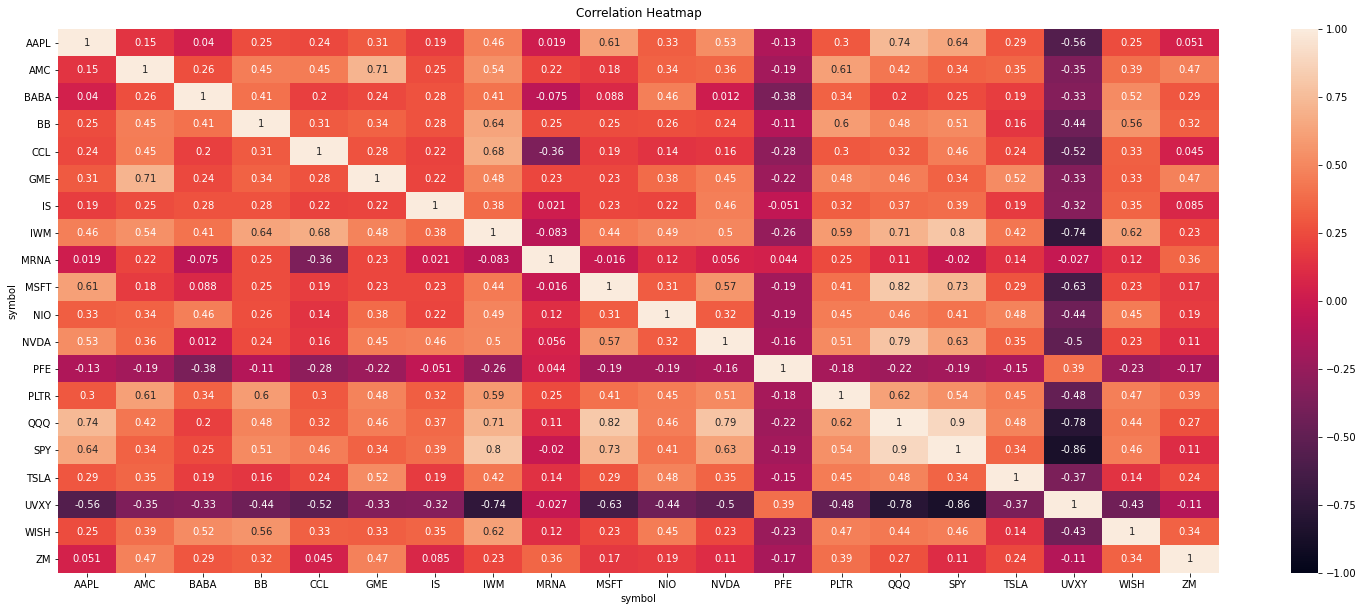

In [23]:
#correlation matricx

plt.figure(figsize=(26, 10))
heatmap1 = sns.heatmap(yq_dataT.corr(), vmin=-1, vmax=1, annot=True)

heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

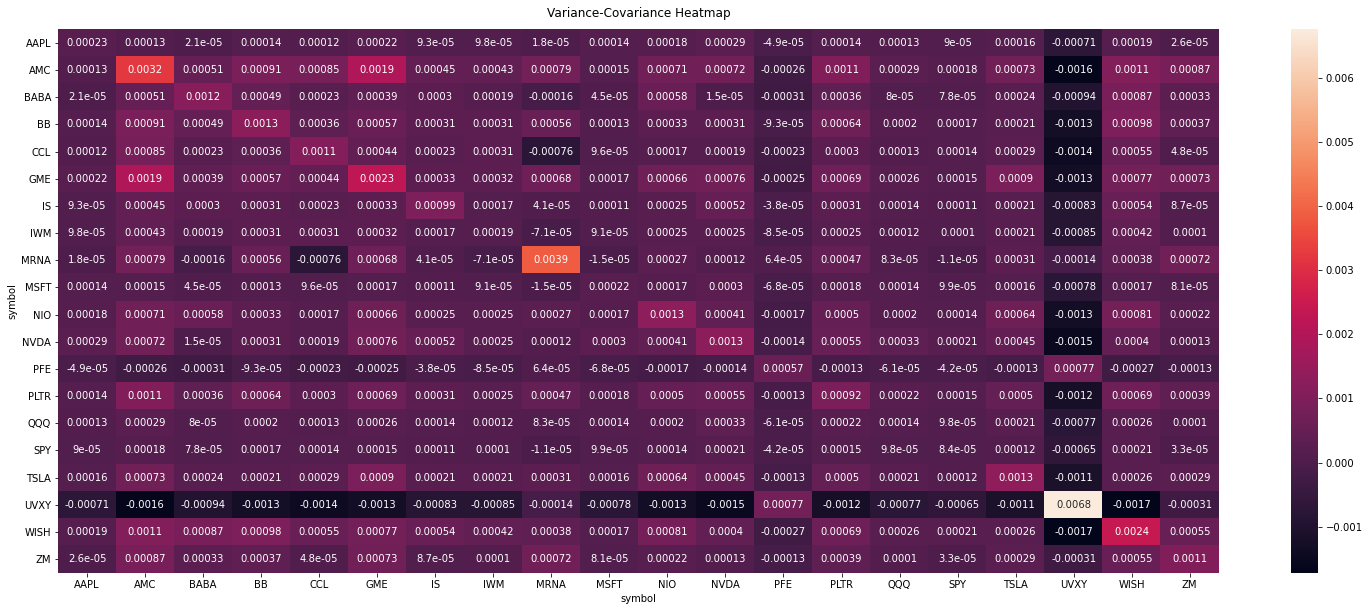

In [22]:
plt.figure(figsize=(26, 10))
heatmap2 = sns.heatmap(cov_matrix, annot=True)

heatmap2.set_title('Covariance Heatmap', fontdict={'fontsize':12}, pad=12);

In [24]:
avg_rets = yq_dataT.mean()
avg_rets

symbol
AAPL    0.002667
AMC    -0.004827
BABA   -0.004321
BB     -0.001114
CCL    -0.003382
GME    -0.003588
IS     -0.006570
IWM    -0.000470
MRNA   -0.006933
MSFT    0.001253
NIO    -0.003554
NVDA    0.003967
PFE     0.005353
PLTR   -0.006180
QQQ     0.000539
SPY     0.000734
TSLA    0.003133
UVXY   -0.005593
WISH   -0.010260
ZM     -0.005205
dtype: float64

Text(0.5, 1.0, 'Stock Daily returns')

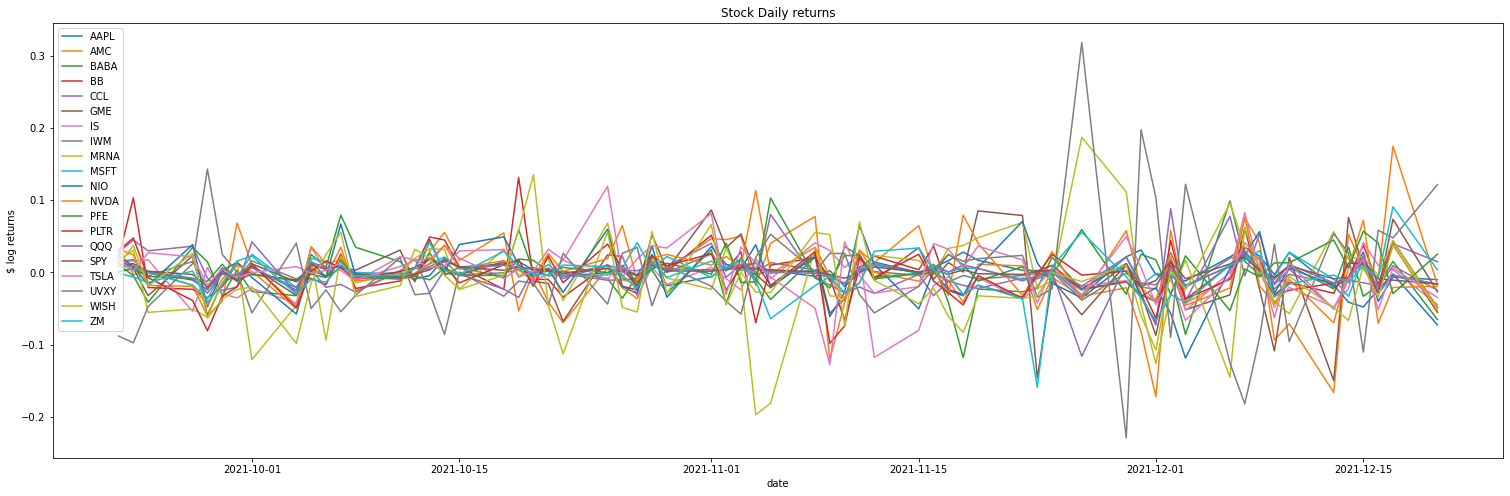

In [33]:
# Plot returns
yq_dataT.plot(figsize=(26,8))
plt.legend(loc='upper left')
plt.ylabel("$ log returns")
plt.title("Stock Daily returns")
